In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv('X_train.csv', header=[0,1,2], index_col=0).drop(columns=['albumin ascites', 'albumin urine', 'creatinine ascites', 'creatinine body fluid', 'creatinine pleural', 'lymphocytes atypical csl', 'lymphocytes percent', 'lymphocytes pleural'])

In [3]:
data.shape

(16760, 6912)

Create dataframe of counts

In [4]:
counts = pd.DataFrame(index=data.index)

In [5]:
for col in data.columns.get_level_values(0).unique():
    counts[col] = data.loc[:, (col, 'mask')].sum(axis=1)

In [6]:
counts = counts.copy()

In [7]:
counts.shape

(16760, 96)

In [8]:
counts.describe()

,alanine aminotransferase,albumin,albumin pleural,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,bilirubin,blood urea nitrogen,...,tidal volume set,tidal volume spontaneous,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,0.836575,0.574761,0.002804,0.815811,2.797792,0.836516,0.448747,2.994749,0.838126,3.020764,...,1.723866,0.863365,0.008473,0.018556,0.051014,0.698986,0.017900,1.038962,2.832518,0.119570
std,1.228366,0.910531,0.053999,1.217511,1.761576,1.231923,0.609410,1.720931,1.235932,1.704439,...,2.459822,1.575233,0.095485,0.141853,0.331113,1.381092,0.157292,1.028201,1.587567,0.347038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,4.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000
max,13.000000,11.000000,2.000000,13.000000,16.000000,13.000000,4.000000,16.000000,13.000000,16.000000,...,24.000000,13.000000,3.000000,3.000000,5.000000,11.000000,5.000000,21.000000,16.000000,3.000000


Create histogram of median counts

Text(0.5, 1.0, 'Histogram of median counts of each variable')

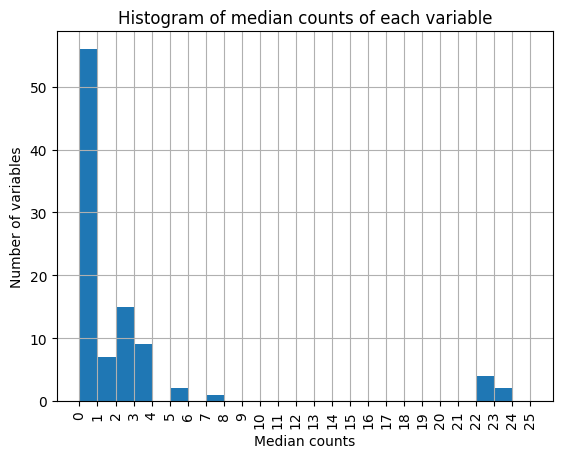

In [9]:
counts.median().hist(bins=range(26))
ticks=plt.xticks(range(26), rotation=90)
plt.xlabel('Median counts')
plt.ylabel('Number of variables')
plt.title('Histogram of median counts of each variable')

Create histogram of 3rd quartile counts

Text(0.5, 1.0, 'Histogram of 3rd quartile counts of each variable')

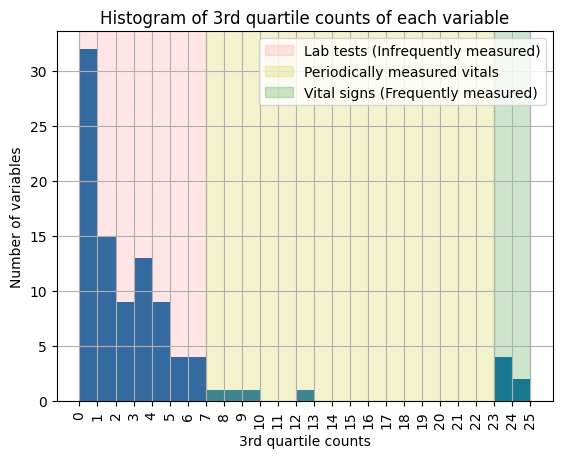

In [10]:
counts.quantile(0.75).hist(bins=range(26))
ticks=plt.xticks(range(26), rotation=90)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

plt.fill_between(range(8), 50, 0, color='r', alpha=0.1, label='Lab tests (Infrequently measured)')
plt.fill_between(range(7, 24), 50, 0, color='y', alpha=0.2, label='Periodically measured vitals')
plt.fill_between(range(23, 26), 50, 0, color='g', alpha=0.2, label='Vital signs (Frequently measured)')

plt.gca().set_ylim(ylim)

plt.legend()
plt.xlabel('3rd quartile counts')
plt.ylabel('Number of variables')
plt.title('Histogram of 3rd quartile counts of each variable')

In [11]:
len(data)

16760

In [12]:
from math import ceil

Get histogram above, in list format

In [13]:
vals = counts.quantile(q=0.75).values
items = counts.quantile(q=0.75).index
counts_dict = {}

for i, v in enumerate(vals):
    if v not in counts_dict:
        counts_dict[v] = []
    
    counts_dict[v].append(items[i])

In [14]:
counts_dict = list(counts_dict.items())
counts_dict.sort(key=lambda x: x[0])

In [15]:
counts_dict

[(0.0,
  ['albumin pleural',
   'calcium urine',
   'cardiac index',
   'cardiac output fick',
   'cardiac output thermodilution',
   'chloride urine',
   'cholesterol',
   'cholesterol hdl',
   'cholesterol ldl',
   'creatinine urine',
   'eosinophils',
   'fraction inspired oxygen',
   'height',
   'lactate dehydrogenase pleural',
   'lymphocytes ascites',
   'lymphocytes atypical',
   'lymphocytes body fluid',
   'monocytes csl',
   'post void residual',
   'pulmonary artery pressure mean',
   'pulmonary artery pressure systolic',
   'pulmonary capillary wedge pressure',
   'red blood cell count ascites',
   'red blood cell count csf',
   'red blood cell count pleural',
   'red blood cell count urine',
   'systemic vascular resistance',
   'total protein',
   'total protein urine',
   'troponin-i',
   'venous pvo2',
   'white blood cell count urine']),
 (1.0,
  ['alanine aminotransferase',
   'albumin',
   'alkaline phosphate',
   'asparate aminotransferase',
   'basophils',
   'bil

Generate preprocessed dataset

In [16]:
from tqdm import tqdm

In [17]:
means = []
changes = []
counts = []
for col in tqdm(data.columns.get_level_values(0).unique()):
    buffer_df = data.loc[:, (col, 'mask')] \
                                    .replace({0: np.nan}) \
                                    .multiply(data.loc[:, (col, 'mean')]) \
                                    .interpolate(axis=1, limit_area='inside') \
                                    .fillna(method='ffill', axis=1) \
                                    .fillna(method='bfill', axis=1) \
                                    .fillna(data.loc[:, (col, 'mean')])
    
    means.append(buffer_df.mean(axis=1))
    changes.append(buffer_df.iloc[:, -1] - buffer_df.iloc[:, 0])
    counts.append(data.loc[:, (col, 'mask')].sum(axis=1))

mean_cols = []
change_cols = []
count_cols = []

for col in tqdm(data.columns.get_level_values(0).unique()):
    mean_cols.append(col + ';mean')
    change_cols.append(col + ';change')
    count_cols.append(col + ';count')

cleaned_data = pd.concat(means + changes + counts, axis=1)
cleaned_data.columns = mean_cols + change_cols + count_cols
cleaned_data.index = data.index

100%|███████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 314572.80it/s]


In [18]:
y_mort = pd.read_csv('Y_train.csv', index_col=0).iloc[:, 0]

In [19]:
y_los = pd.read_csv('Y_train_reg.csv', index_col=0).iloc[:, 0]

Generate dataframe of correlations

In [20]:
corrs_df = pd.DataFrame(index=cleaned_data.columns, columns=['mort', 'los'])

In [21]:
for col in cleaned_data.columns:
    corrs_df.at[col, 'mort'] = np.corrcoef(cleaned_data[col], y_mort)[0,1]
    corrs_df.at[col, 'los'] = np.corrcoef(cleaned_data[col], y_los)[0,1]

/home/eehit/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/eehit/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [22]:
corrs_df=corrs_df.astype('float32')

In [23]:
corrs_df.mort.loc[np.abs(corrs_df.mort).sort_values(ascending=False).index].head(6)

respiratory rate set;count       0.234424
tidal volume observed;count      0.233087
tidal volume set;count           0.231144
glascow coma scale total;mean   -0.220582
anion gap;mean                   0.216106
plateau pressure;count           0.209914
Name: mort, dtype: float32

In [24]:
high_corr_list = corrs_df.mort.loc[np.abs(corrs_df.mort).sort_values(ascending=False).index].head(6).index

In [25]:
high_corr_list_reg = corrs_df.los.loc[np.abs(corrs_df.los).sort_values(ascending=False).index].head(6).index

In [26]:
corrs_df.los.loc[np.abs(corrs_df.los).sort_values(ascending=False).index].head(6)

tidal volume observed;count                   0.301865
tidal volume set;count                        0.301694
respiratory rate set;count                    0.301025
peak inspiratory pressure;count               0.289860
positive end-expiratory pressure set;count    0.288796
plateau pressure;count                        0.287358
Name: los, dtype: float32

In [27]:
cleaned_data['mort_icu'] = y_mort.astype('int32')
cleaned_data['los_icu'] = y_los.astype('float32')

Visualize high correlation variables with mort through boxplots

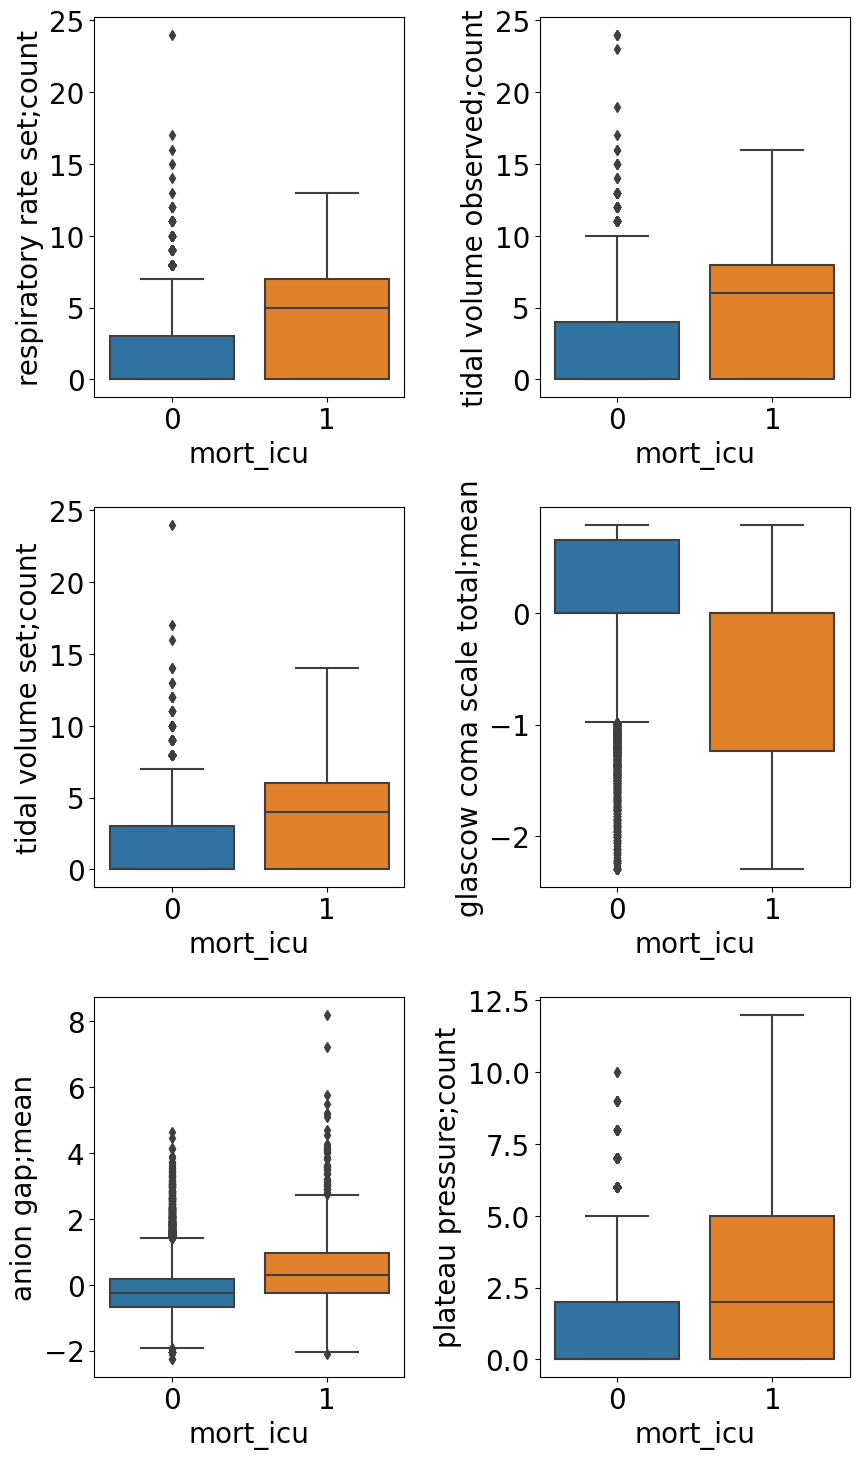

In [28]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, axes = plt.subplots(3, 2, figsize=(9, 15))
for i, col in enumerate(high_corr_list):
    sns.boxplot(data=cleaned_data, y=col, x='mort_icu', ax=axes[i // 2, i % 2])
plt.tight_layout()
plt.show()

Visualize high correlation variables with LOS through regplots

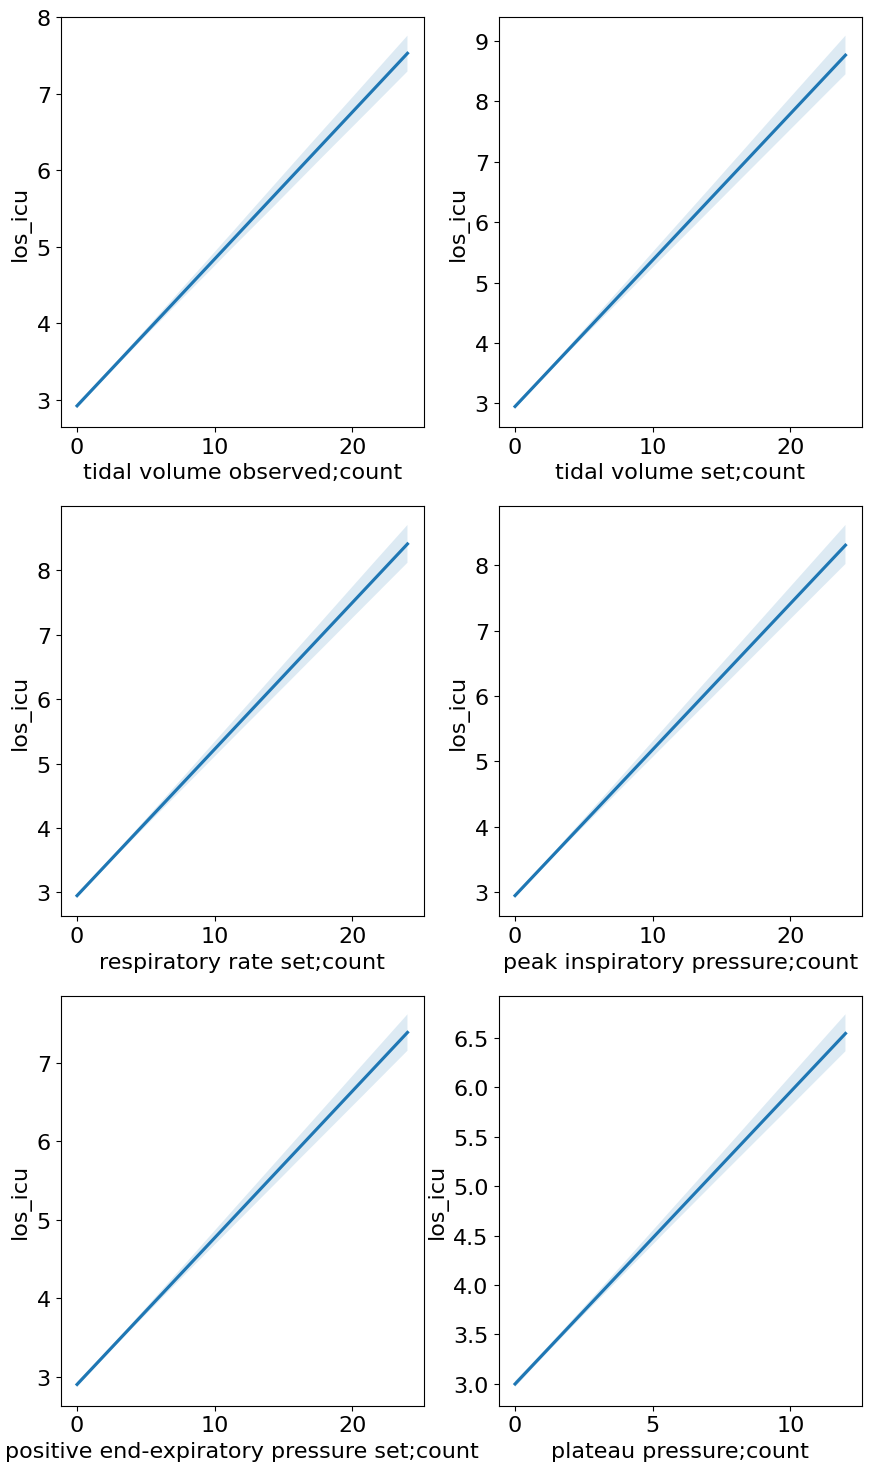

In [30]:
font = {'size'   : 16}
matplotlib.rc('font', **font)
fig, axes = plt.subplots(3, 2, figsize=(9, 15))
for i, col in enumerate(corrs_df.los.loc[np.abs(corrs_df.los).sort_values(ascending=False).index].head(6).index):
    sns.regplot(data=cleaned_data, y='los_icu', x=col, ax=axes[i // 2, i % 2], scatter=False)
plt.tight_layout()
plt.show()